In [1]:
#Perform exploratory data analysis
import numpy as np
import pandas as pd
# importing matplotlib library
import matplotlib.pyplot as plt

# #to find encoding, do following:
# with open('ACME-HappinessSurvey2020.csv') as f:
#     print(f)

#load dataset and view head
dataset = pd.read_csv('ACME-HappinessSurvey2020.csv', encoding='cp1252') 
dataset.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [2]:
#take a look at basic statistics
dataset.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [3]:
#find the number of unhappy customers, happy customers
dataset[dataset['Y']==0].shape,dataset[dataset['Y']==1].shape, dataset.shape
#there are 57 unhappy customers and 69 happy customers, with a total of 126 total customers

((57, 7), (69, 7), (126, 7))

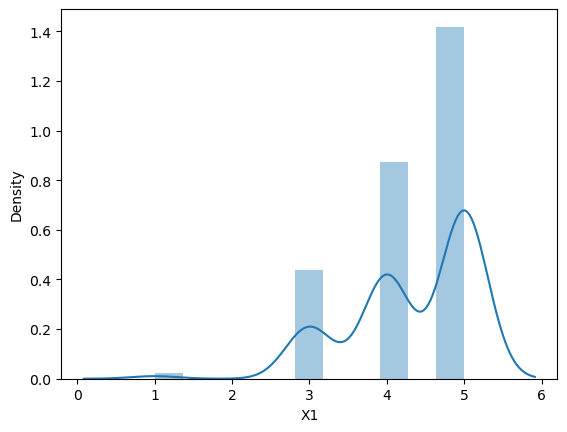

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Distribution
vis1 = sns.distplot(dataset['X1'])
#The company seems to be doing okay on delivery time

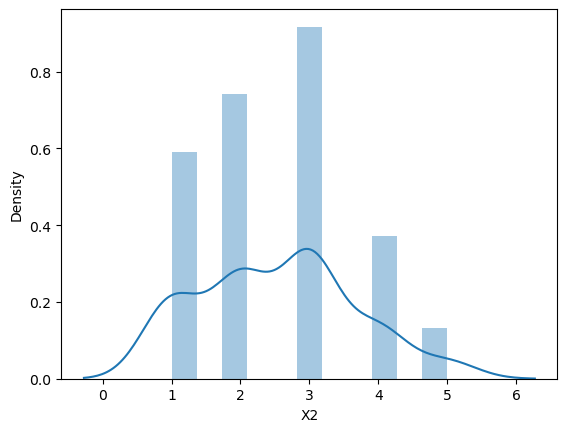

In [5]:
#distribution for X2
vis2 = sns.distplot(dataset['X2'])
#the company seems to be struggling with the content of orders being as expected

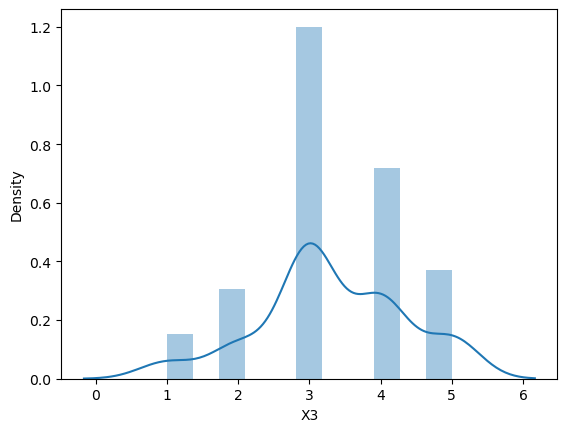

In [6]:
#Distribution for X3
vis3 = sns.distplot(dataset['X3'])
#the company appears to be doing okay on X3; customer ordering everything they wanted to order

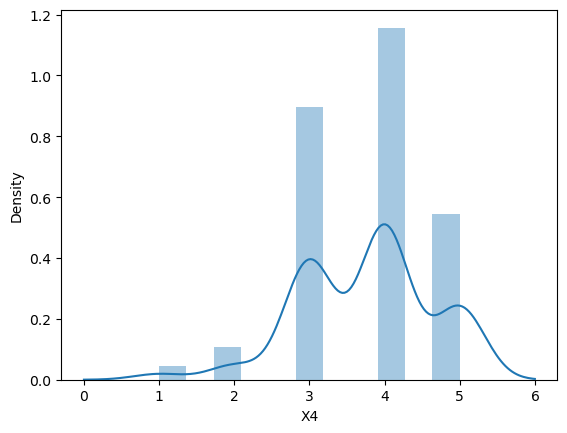

In [7]:
#Distribution for X4
vis4 = sns.distplot(dataset['X4'])
#customers seem satisfied with the price paid

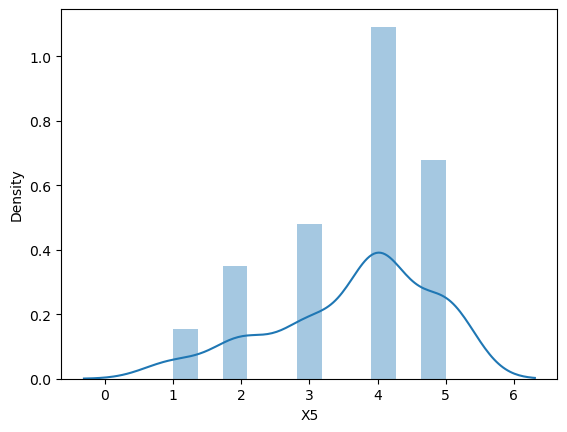

In [8]:
#Distribution for X5
vis5 = sns.distplot(dataset['X5'])
#satisfaction with courier seems ok

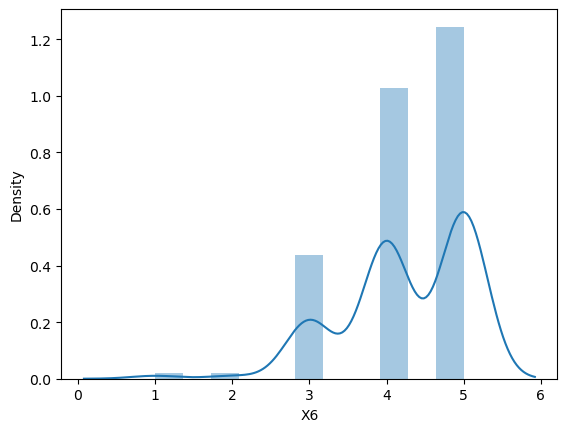

In [9]:
#Distribution for X6
vis6 = sns.distplot(dataset['X6'])
#ease of ordering on app seems good

In [10]:
#Perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter

#Define X and Y using dataset
X = dataset.iloc[:,1:].values
Y = dataset.iloc[:,0].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



accuracy:0.6153846153846154
confusion matrix:
[[ 5  5]
 [ 5 11]]


In [11]:
#KNN 

#Perform cross validation to find the optimal number of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)
# print optimal number of neighbors
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

#Perform KNN using k=10 neighbors
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p =2) #euclidean metric
classifierKNN.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifierKNN.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 10}
Accuracy for our training dataset with tuning is : 67.00%
accuracy:0.5384615384615384
confusion matrix:
[[ 4  6]
 [ 6 10]]


In [12]:
#Linear SVM

#Perform cross validation to find the optimal C value for SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
C_range = list(np.arange(0.05,1,.001))
parameters = {'kernel':['linear'], 'C':C_range}
  
grid = GridSearchCV(svc, parameters, cv=10, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train) 
# print optimal C value
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
# print best estimator
print(grid.best_estimator_)

#SVM using optimal C
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', C=.058, decision_function_shape='ovr')
svclassifier.fit(X_train, Y_train)  

#Predicting the Test set results
Y_pred = svclassifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



Fitting 10 folds for each of 950 candidates, totalling 9500 fits
{'C': 0.05800000000000001, 'kernel': 'linear'}
Accuracy for our training dataset with tuning is : 57.00%
SVC(C=0.05800000000000001, kernel='linear')
accuracy:0.5769230769230769
confusion matrix:
[[ 4  6]
 [ 5 11]]


In [13]:
#Kernal SVM

#Perform cross validation to find the optimal C value for kernel SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
C_range = list(np.arange(1,20,.5))
parameters = {'kernel':['rbf'], 'C':C_range}
  
grid = GridSearchCV(svc, parameters, cv=10, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train) 
# print optimal C value
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
# print best estimator
print(grid.best_estimator_)

#Kernel SVM; use gaussian rbf kernel and optimal C value

svclassifier = SVC(kernel='rbf', C=1.5)
svclassifier.fit(X_train, Y_train)  

#Predicting the Test set results
Y_pred = svclassifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



Fitting 10 folds for each of 38 candidates, totalling 380 fits
{'C': 1.5, 'kernel': 'rbf'}
Accuracy for our training dataset with tuning is : 64.00%
SVC(C=1.5)
accuracy:0.5769230769230769
confusion matrix:
[[ 4  6]
 [ 5 11]]


In [14]:
#Perform Naive Bayes

#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = model.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')


accuracy:0.5769230769230769
confusion matrix:
[[ 4  6]
 [ 5 11]]


In [15]:
#Decision tree
#Fitting decision tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



accuracy:0.5
confusion matrix:
[[6 4]
 [9 7]]


In [16]:
#Perform Random Forest

#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')


accuracy:0.6538461538461539
confusion matrix:
[[ 7  3]
 [ 6 10]]


In [17]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, random_state=0)
clf.fit(X_train, Y_train)
#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')


accuracy:0.6153846153846154
confusion matrix:
[[ 6  4]
 [ 6 10]]


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=2, random_state=0).fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')


accuracy:0.6153846153846154
confusion matrix:
[[ 6  4]
 [ 6 10]]


In [19]:
#Perform LASSO
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
# L1 regularization is equivalent to Lasso for logistic regression
# This will create 20 values for C, spaced logarithmically between 1e-4 and 1e4.
Cs_values = np.logspace(-4, 4, 20)
logreg_cv = LogisticRegressionCV(Cs=Cs_values, cv=10, penalty='l1', solver='saga', max_iter=10000)
logreg_cv.fit(X_train, Y_train)

optimal_C = logreg_cv.C_[0]  # For binary classification, there's only one C value
print(f"Optimal C: {optimal_C}")

Y_pred = logreg_cv.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc}")

selected_features = np.where(logreg_cv.coef_[0] != 0)[0]
print("Selected Features:", selected_features)


Optimal C: 11.288378916846883
Accuracy: 0.6153846153846154
Selected Features: [0 1 2 3 4 5]


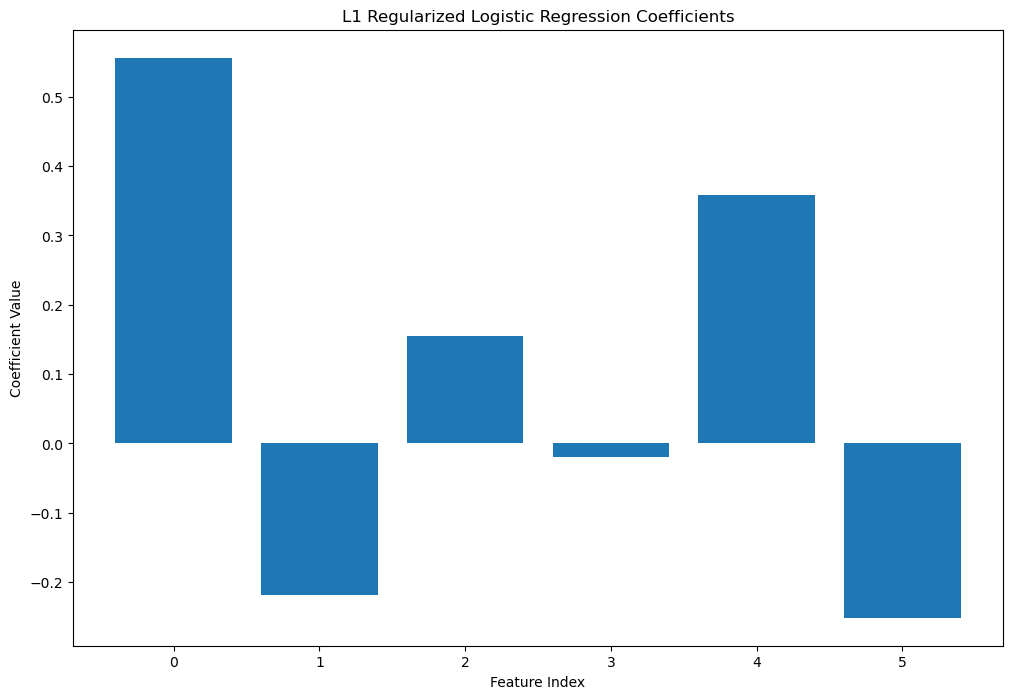

In [20]:
import matplotlib.pyplot as plt

# Visualize coefficients
plt.figure(figsize=(12,8))
plt.bar(range(len(logreg_cv.coef_[0])), logreg_cv.coef_[0])
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("L1 Regularized Logistic Regression Coefficients")
plt.show()


In [21]:
#Based on the above bar graph, we can see that X1, X2, X5, and X6 are the most significant features
#Let's try only considering X1, X5, and X6 as predictors
#Perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter

#Define X and Y using dataset
X = dataset.iloc[:,[1,5,6]].values
Y = dataset.iloc[:,0].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



accuracy:0.6153846153846154
confusion matrix:
[[ 5  5]
 [ 5 11]]


In [22]:
#KNN 

#Perform cross validation to find the optimal number of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)
# print optimal number of neighbors
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

#Perform KNN using k=10 neighbors
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=grid_search.best_params_['n_neighbors']
classifierKNN = KNeighborsClassifier(n_neighbors = n_neighbors, metric = 'minkowski', p =2) #euclidean metric
classifierKNN.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifierKNN.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 68.00%
accuracy:0.5769230769230769
confusion matrix:
[[6 4]
 [7 9]]


In [23]:
#Linear SVM

#Perform cross validation to find the optimal C value for SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
C_range = list(np.arange(0.05,1,.001))
parameters = {'kernel':['linear'], 'C':C_range}
  
grid = GridSearchCV(svc, parameters, cv=10, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train) 
# print optimal C value
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
# print best estimator
print(grid.best_estimator_)

#SVM using optimal C
from sklearn.svm import SVC
C=grid_search.best_params_['C']
svclassifier = SVC(kernel='linear', C=C, decision_function_shape='ovr')
svclassifier.fit(X_train, Y_train)  

#Predicting the Test set results
Y_pred = svclassifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



Fitting 10 folds for each of 950 candidates, totalling 9500 fits
{'C': 0.09400000000000004, 'kernel': 'linear'}
Accuracy for our training dataset with tuning is : 58.00%
SVC(C=0.09400000000000004, kernel='linear')
accuracy:0.6153846153846154
confusion matrix:
[[ 5  5]
 [ 5 11]]


In [24]:
#Kernal SVM

#Perform cross validation to find the optimal C value for kernel SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
C_range = list(np.arange(1,20,.5))
parameters = {'kernel':['rbf'], 'C':C_range}
  
grid = GridSearchCV(svc, parameters, cv=10, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train) 
# print optimal C value
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
# print best estimator
print(grid.best_estimator_)

#Kernel SVM; use gaussian rbf kernel and optimal C value
C=grid_search.best_params_['C']
svclassifier = SVC(kernel='rbf', C=C)
svclassifier.fit(X_train, Y_train)  

#Predicting the Test set results
Y_pred = svclassifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



Fitting 10 folds for each of 38 candidates, totalling 380 fits
{'C': 3.5, 'kernel': 'rbf'}
Accuracy for our training dataset with tuning is : 64.00%
SVC(C=3.5)
accuracy:0.7692307692307693
confusion matrix:
[[ 6  4]
 [ 2 14]]


In [25]:
#Perform Naive Bayes

#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = model.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')


accuracy:0.5769230769230769
confusion matrix:
[[ 4  6]
 [ 5 11]]


In [26]:
#Decision tree
#Fitting decision tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')



accuracy:0.7307692307692307
confusion matrix:
[[ 7  3]
 [ 4 12]]


In [27]:
#Perform Random Forest

#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')


accuracy:0.7307692307692307
confusion matrix:
[[ 7  3]
 [ 4 12]]


In [28]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, random_state=0)
clf.fit(X_train, Y_train)
#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')


accuracy:0.6538461538461539
confusion matrix:
[[ 5  5]
 [ 4 12]]


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=2, random_state=0).fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')


accuracy:0.7692307692307693
confusion matrix:
[[ 7  3]
 [ 3 13]]


In [30]:
#Perform LASSO
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
# L1 regularization is equivalent to Lasso for logistic regression
# This will create 20 values for C, spaced logarithmically between 1e-4 and 1e4.
Cs_values = np.logspace(-4, 4, 20)
logreg_cv = LogisticRegressionCV(Cs=Cs_values, cv=10, penalty='l1', solver='saga', max_iter=10000)
logreg_cv.fit(X_train, Y_train)

optimal_C = logreg_cv.C_[0]  # For binary classification, there's only one C value
print(f"Optimal C: {optimal_C}")

Y_pred = logreg_cv.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc}")

selected_features = np.where(logreg_cv.coef_[0] != 0)[0]
print("Selected Features:", selected_features)


Optimal C: 4.281332398719396
Accuracy: 0.6153846153846154
Selected Features: [0 1 2]


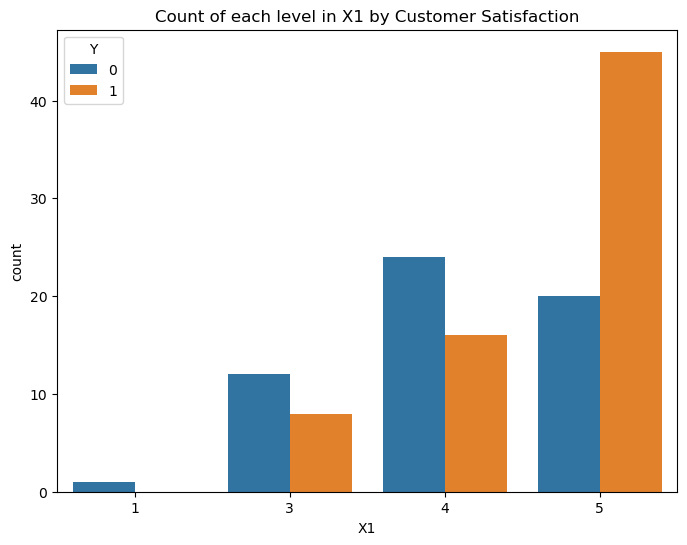

In [31]:
# Bar Plot for X1
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='X1', hue='Y')
plt.title("Count of each level in X1 by Customer Satisfaction")
plt.show()

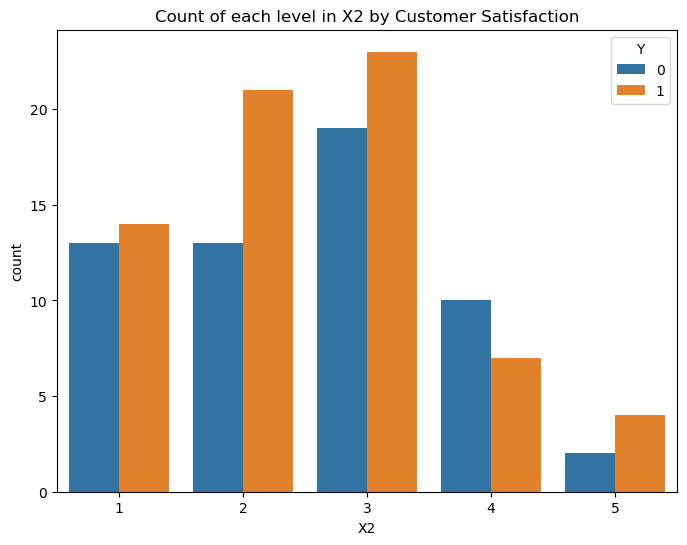

In [32]:
# Bar Plot for X2; the higher score for content of order being expected, the less happy as well as unhappy customers
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='X2', hue='Y')
plt.title("Count of each level in X2 by Customer Satisfaction")
plt.show()

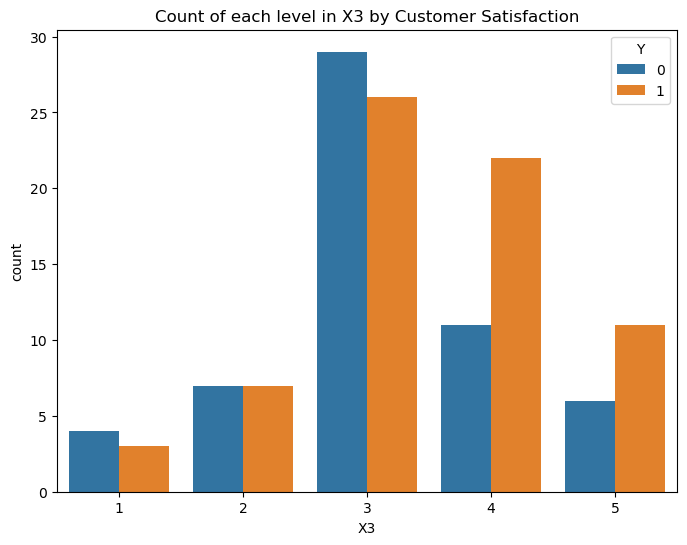

In [33]:
# Bar Plot for X3; 
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='X3', hue='Y')
plt.title("Count of each level in X3 by Customer Satisfaction")
plt.show()

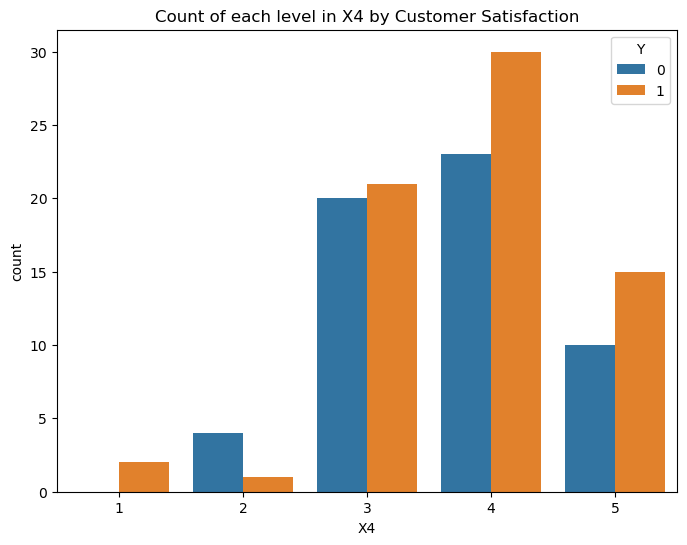

In [34]:
# Bar Plot for X4; 
#whether the customer paid a good price seems to make little difference to whether the customer is happy or unhappy
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='X4', hue='Y')
plt.title("Count of each level in X4 by Customer Satisfaction")
plt.show()

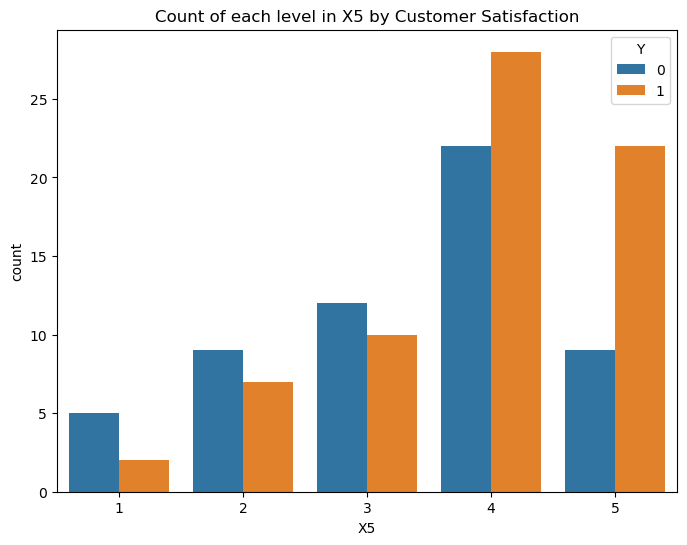

In [35]:
# Bar Plot for X5
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='X5', hue='Y')
plt.title("Count of each level in X5 by Customer Satisfaction")
plt.show()

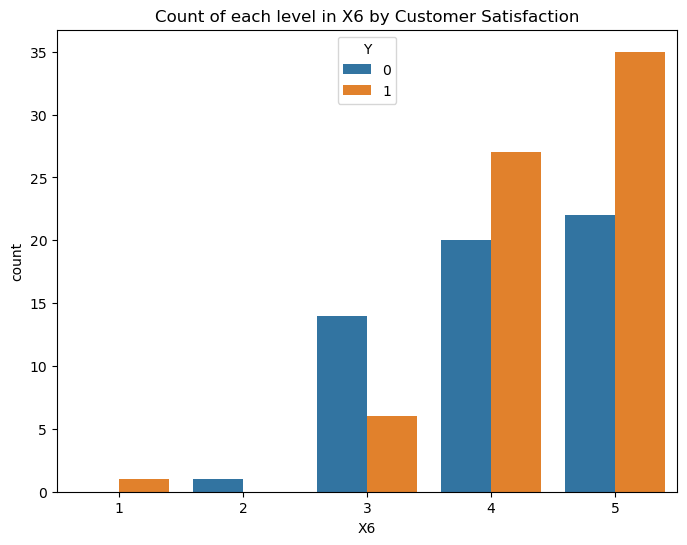

In [36]:
# Bar Plot for X6; the higher score for ease of ordering, both the number of happy and the number of unhappy customers increases
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='X6', hue='Y')
plt.title("Count of each level in X6 by Customer Satisfaction")
plt.show()

In [37]:
from scipy.stats import mannwhitneyu
# Mann-Whitney U Test; X1, X5, and X6 are statistically significant. 
#p value is less than .05 for X1 and X5 while p value is close to .05 for X6.
happy = dataset[dataset['Y'] == 1]['X6']
unhappy =dataset[dataset['Y'] == 0]['X6']
u_stat, p_val = mannwhitneyu(happy, unhappy)
print(f"U-statistic: {u_stat}, P-value: {p_val}")

U-statistic: 2333.0, P-value: 0.05189502660977706
